# Cruising through $S(T,P)$
### Neshyba, 2021


## Learning Goals
1. Explain what controls the shape of $\big (\partial S/ \partial T \big )_P$, $\big (\partial S/ \partial P \big )_T$, and $S$ in $T,P$ state space, and how these shapes differ according to phase. 
1. Use a 2-d integrator to construct a numerical representation of a state function.
1. Explain trends in $\Delta S_{vap}$, $\Delta S_{fus}$, and $\Delta S_{sub}$ with increasing temperature and pressure.

In [22]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import pint
from pint import UnitRegistry
ureg = UnitRegistry()
AssignQuantity = ureg.Quantity
import PchemLibrary as PL
from mpl_toolkits.mplot3d import axes3d

In [23]:
%matplotlib notebook

In [24]:
def plot_surface(Tgrid, Pgrid, dSdT_gas, color='blue'):
    ax.plot_surface(Tgrid.magnitude, Pgrid.magnitude, dSdT_gas.magnitude, color=color)

### Lay out a T,P state space

In [25]:
# Lay out the state space
Tgrid, Pgrid_bar = PL.Statespace([200,400,100],[1,10,101])
Pgrid = AssignQuantity(Pgrid_bar,'bar').to('pascal')
Tgrid = AssignQuantity(Tgrid,'K')

### Some general-purpose constants

In [26]:
# Gas constant in SI units
R = AssignQuantity(8.314,'J /mol/K')

# Standard state conditions, in SI units
T0 = AssignQuantity(298,'K')
P0 = AssignQuantity(1e5,'pascal')

### Constants pertaining to water
The following cell provides constants for three phases of water - See https://webbook.nist.gov/chemistry/name-ser/ for standard-state entropy values.

In [27]:
# Some SI units related to entropy
EUnits = 'J/K/mol'
dSdTUnits = 'J / kelvin^2 /mole'
dSdPUnits = 'meter ** 3 / kelvin / mole'

# Molar mass of water
M = AssignQuantity(18,'g/mol')

# Parameters for gaseous water
CP_gas = AssignQuantity(33.6,EUnits)
SS_gas = [T0,P0,AssignQuantity(188.835,EUnits)] # Specifying the standard state entropy

# Parameters for liquid water
Vgrid_liq = AssignQuantity(0.018,'m^3 /mol')*np.ones(np.shape(Pgrid)) # Molar volume, as a state-space grid
alpha_P_liq = AssignQuantity(2.1e-4,'1/K') # Thermal expansivity
CP_liq = AssignQuantity(75.4,EUnits) # Heat capacity
SS_liq = [T0,P0,AssignQuantity(69.95,EUnits)]

# Parameters for ice water
Vgrid_sol = 1.1*Vgrid_liq # 10% of icebergs are above the water
alpha_P_sol = alpha_P_liq # Assuming the thermal expansivity of ice is like that of liquid water
CP_sol = AssignQuantity(38,EUnits)
SS_sol = [T0,P0,AssignQuantity(46.5,EUnits)]

### Pause for analysis
Most of the quantities listed above are in SI units -- but *one* is not! In the cell below, fix it with an ".ito" conversion. It might help to refer to https://en.wikipedia.org/wiki/International_System_of_Units. 

In [28]:
### BEGIN SOLUTION
M.ito('kg/mol')
print(M)
### END SOLUTION

0.018000000000000002 kilogram / mole


### Let's have a look at the $\big (\partial S/ \partial T \big )_P$ for the gas
Below, we calculate and display $\big (\partial S/ \partial T \big )_P = \frac {C_{P,gas}}T$, using gray because, you know, that's the color of the Pacific Northwest sky most of the time.

<IPython.core.display.Javascript object>


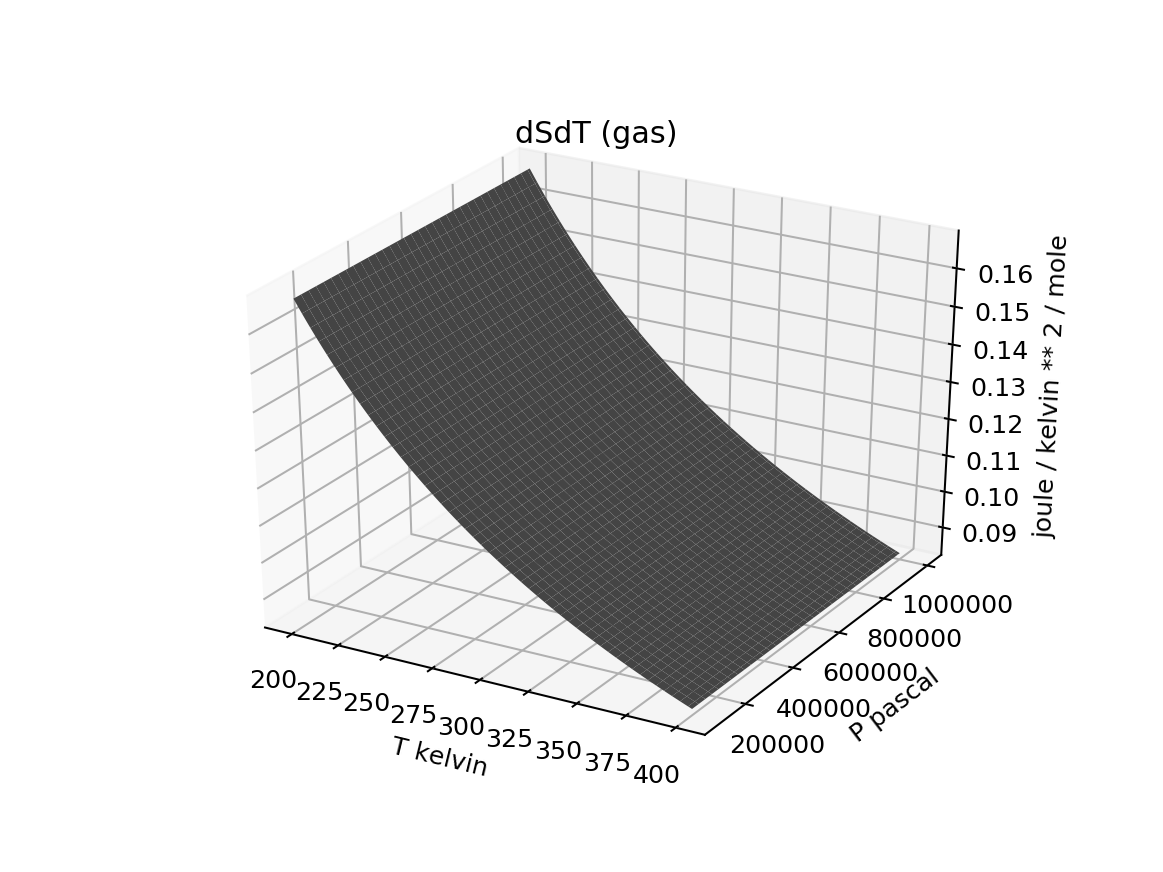

Text(0.5, 0.92, 'dSdT (gas)')

In [29]:
# dSdT for the gas
dSdT_gas = CP_gas/Tgrid

# The rest is graphics
xlabel = "T "+str(Tgrid.units)
ylabel = "P "+str(Pgrid.units)
ax = plt.figure().gca(projection='3d') # Set up a three dimensional graphics window 
plot_surface(Tgrid, Pgrid, dSdT_gas, color='gray')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(str(dSdT_gas.units))
ax.set_title('dSdT (gas)')

### Your turn: $\big (\partial S/ \partial T \big )_P$ surface for the liquid
In the cell below, calculate $\big (\partial S/ \partial T \big )_P = \frac {C_{P,liq}} T$. Then plot $\big (\partial S/ \partial T \big )_P$ for liquid *and* gas on the same graph. To help keep things straight, make the liquid blue-colored (like the ocean), and keep the gas gray-colored.

<IPython.core.display.Javascript object>


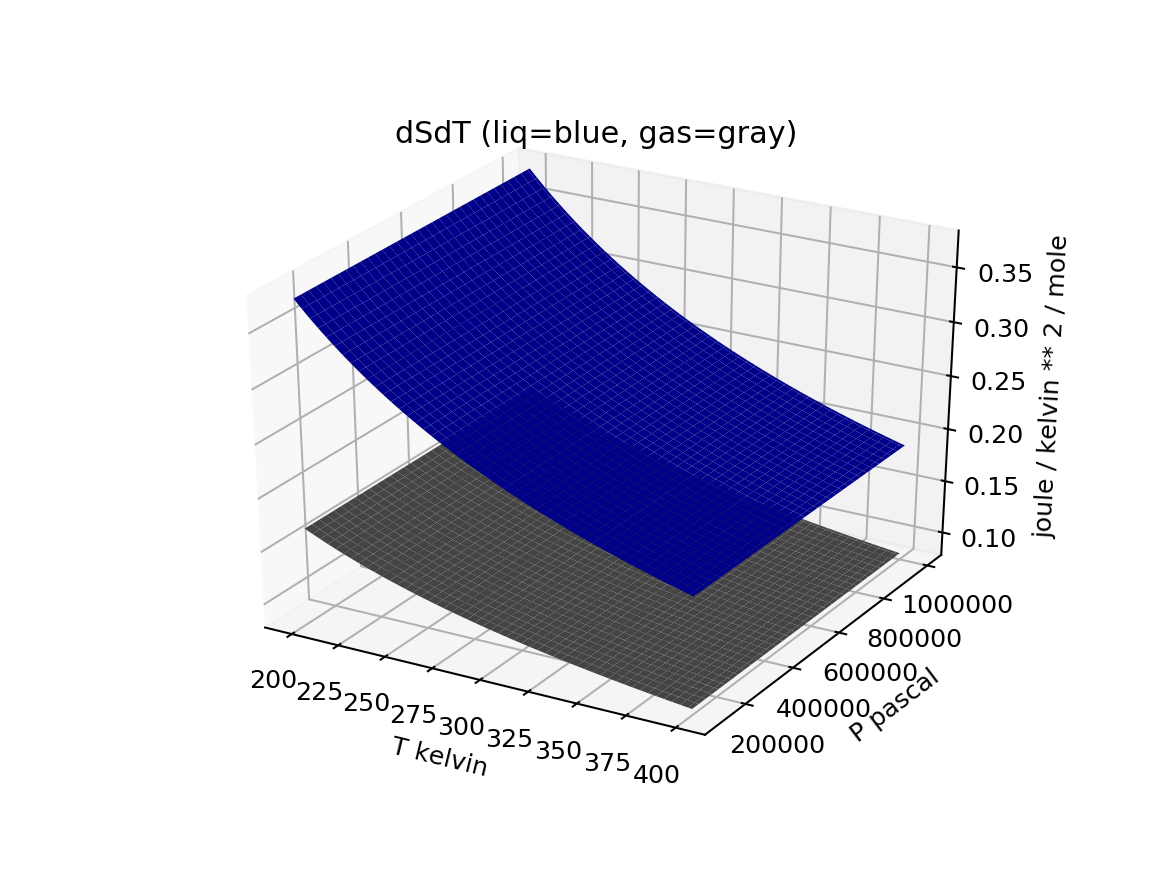

Text(0.5, 0.92, 'dSdT (liq=blue, gas=gray)')

In [30]:
# dSdT for the liquid
### BEGIN SOLUTION 
dSdT_liq = CP_liq/Tgrid
### END SOLUTION

# Graphics
### BEGIN SOLUTION 
xlabel = "T "+str(Tgrid.units)
ylabel = "P "+str(Pgrid.units)
ax = plt.figure().gca(projection='3d') # Set up a three dimensional graphics window 
plot_surface(Tgrid, Pgrid, dSdT_liq, color='blue')
plot_surface(Tgrid, Pgrid, dSdT_gas, color='gray')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(str(dSdT_liq.units))
### END SOLUTION

ax.set_title('dSdT (liq=blue, gas=gray)')

### Pause for analysis
The liquid has values that are a lot bigger than the gas! That means the we should expect the entropy of the liquid to be a lot more temperature-dependent than the gas.

There's a reason for this that you can trace back to heat capacities. Enter your thinking along these lines in the cell below.

### Your turn: $\big (\partial S/ \partial T \big )_P$ surface for the solid
In the cell below, calculate $\big (\partial S/ \partial T \big )_P = \frac {C_{P,sol}} T$. Then plot $\big (\partial S/ \partial T \big )_P$ for solid, liquid and gas on the same graph. To help keep things straight, make the solid black-colored, and keep the gas and liquid as before.

<IPython.core.display.Javascript object>


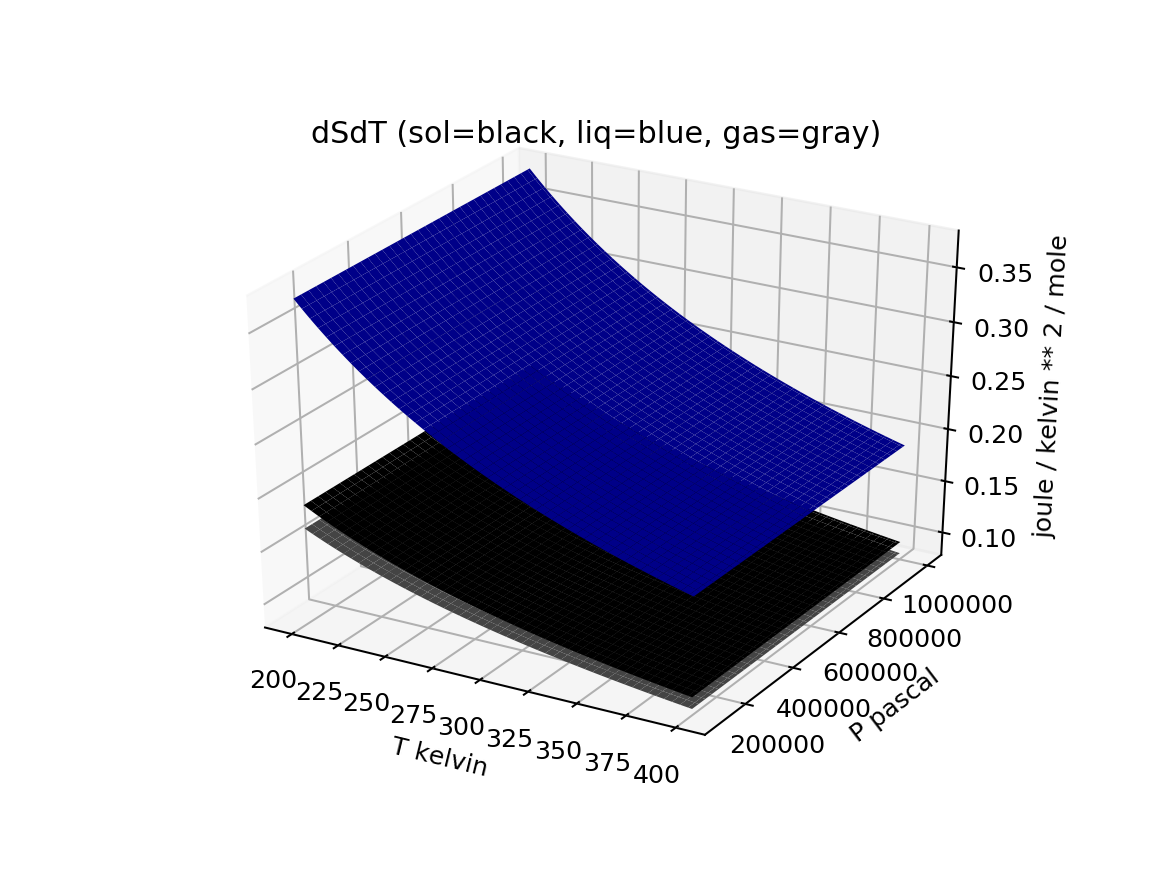

Text(0.5, 0.92, 'dSdT (sol=black, liq=blue, gas=gray)')

In [31]:
# dSdT for the solid
### BEGIN SOLUTION 
dSdT_sol = CP_sol/Tgrid
### END SOLUTION

# Graphics
### BEGIN SOLUTION 
xlabel = "T "+str(Tgrid.units)
ylabel = "P "+str(Pgrid.units)
ax = plt.figure().gca(projection='3d') # Set up a three dimensional graphics window 
plot_surface(Tgrid, Pgrid, dSdT_sol, color='black')
plot_surface(Tgrid, Pgrid, dSdT_liq, color='blue')
plot_surface(Tgrid, Pgrid, dSdT_gas, color='gray')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(str(dSdT_liq.units))
### END SOLUTION

ax.set_title('dSdT (sol=black, liq=blue, gas=gray)')


### Pause for analysis
Going back to the heat capacities, can you explain why what you're looking at makes sense? 

### Your turn: $\big (\partial S/ \partial P \big )_T$

- For the gas, we think $\big (\partial S/ \partial P \big )_T = -R/P$ is a good approximation.
- For the liquid, we think $\big (\partial S/ \partial P \big )_T = -V_{liq} \times \alpha_{P,liq}$, where $V_{liq}$ and $\alpha_{P,liq}$ are constants. 
- For the solid, we think $\big (\partial S/ \partial P \big )_T = -V_{sol} \times \alpha_{P,sol}$, where $V_{sol}$ and $\alpha_{P,sol}$ are constants. 

All these quantities, as written, are on a per-mole basis, according to the constants we've set up above.

In the cell below, calculate and plot all three. It'll be best if you use the same coloring convention as before. You might find it convenient to multiply your $\big (\partial S/ \partial P \big )_T$ values by some big number "on the fly", as in

    ax.plot_surface(Tgrid, Pgrid, dSdP_gas*1e5, color='gray')
    
    

-3.78e-06 meter ** 3 / kelvin / mole
-4.158000000000001e-06 meter ** 3 / kelvin / mole


<IPython.core.display.Javascript object>


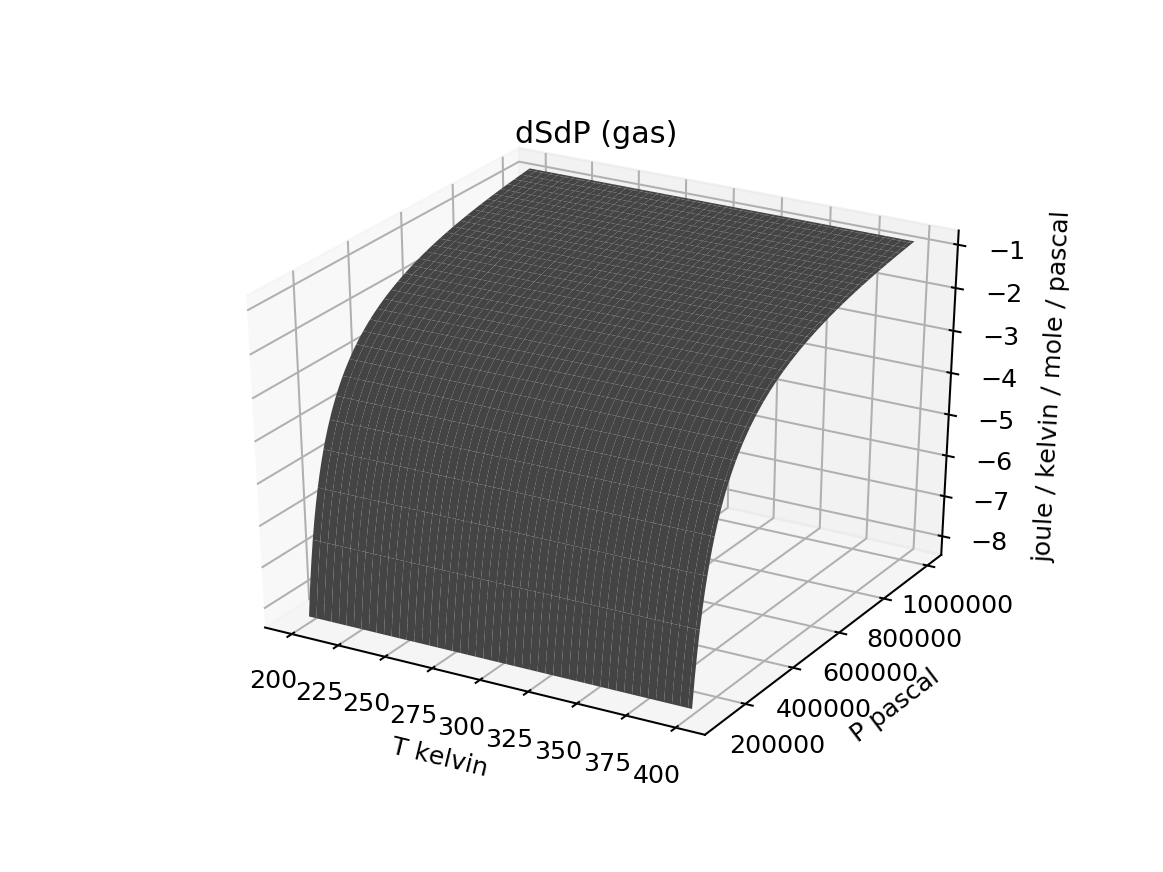

<IPython.core.display.Javascript object>


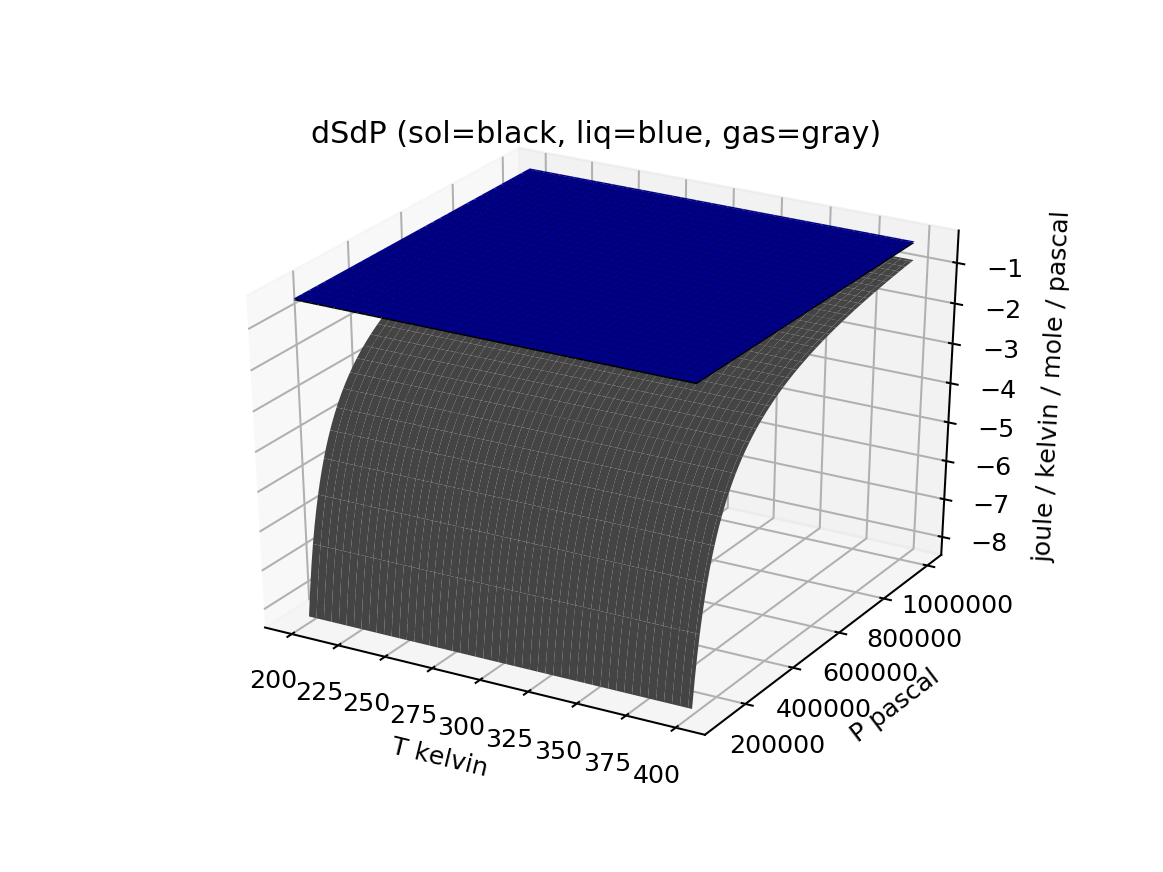

Text(0.5, 0.92, 'dSdP (sol=black, liq=blue, gas=gray)')

In [32]:
# dSdP
### BEGIN SOLUTION
dSdP_gas = -R/Pgrid
dSdP_liq = -Vgrid_liq*alpha_P_liq; print(dSdP_liq[0,0])
dSdP_sol = -Vgrid_sol*alpha_P_sol; print(dSdP_sol[0,0])
### END SOLUTION

# Graphics
### BEGIN SOLUTION
ax = plt.figure().gca(projection='3d') # Set up a three dimensional graphics window 
xlabel = "T "+str(Tgrid.units)
ylabel = "P "+str(Pgrid.units)
plot_surface(Tgrid, Pgrid, dSdP_gas*1e5, color='gray')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(str(dSdP_gas.units))
ax.set_title('dSdP (gas)')

ax = plt.figure().gca(projection='3d') # Set up a three dimensional graphics window 
xlabel = "T "+str(Tgrid.units)
ylabel = "P "+str(Pgrid.units)
plot_surface(Tgrid, Pgrid, dSdP_gas*1e5, color='gray')
plot_surface(Tgrid, Pgrid, dSdP_liq*1e5, color='blue')
plot_surface(Tgrid, Pgrid, dSdP_sol*1e5, color='black')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(str(dSdP_gas.units))


### END SOLUTION

# Display a title
ax.set_title('dSdP (sol=black, liq=blue, gas=gray)')

### Pause for analysis
OK, you've probably noticed that $\big (\partial S/ \partial P \big )_T$ for liquid and solid are almost identical (on this scale, anyway). What do you suppose accounts for the difference between them and the gas?

### Getting the entropy surface of a gas
Below, we show how to use our new state-space integrator, called PL.Integrator, to calculate and display the entropy of water vapor, with an offset standard-state entropy appropriate to the gas (see https://webbook.nist.gov/chemistry/name-ser/). Below that, calculate the entropy of the liquid and solid thermodynamic surfaces too, and then plot all three on the state space.

Assigning units: J/K/mol
Assigning units: J/K/mol
Assigning units: J/K/mol


/home/instructor/chem340/source/Week_10a.CruisingSTP/PchemLibrary.py:84: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  Fgrid[i,:] = integral_along_y
/usr/local/lib/python3.6/dist-packages/scipy/interpolate/fitpack2.py:1183: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ye, kx, ky, s)
/home/instructor/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


<IPython.core.display.Javascript object>


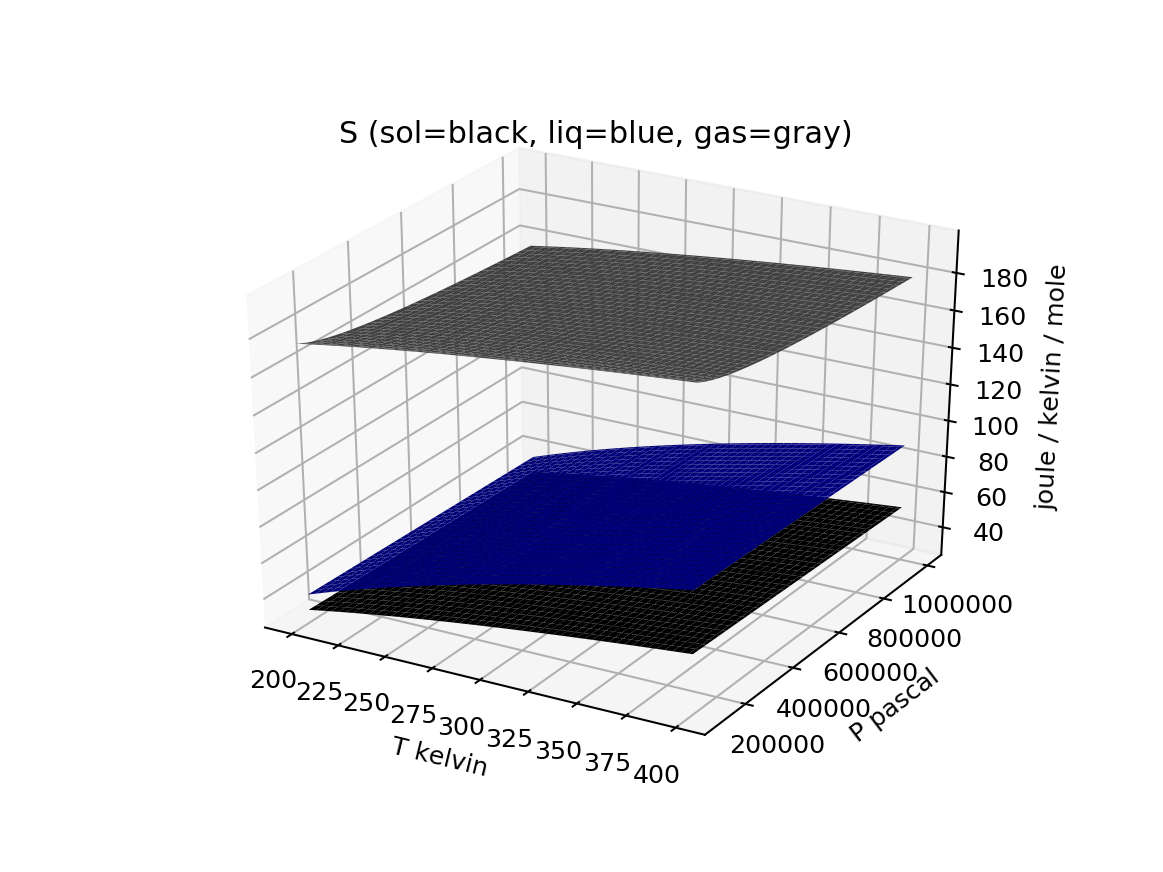

Text(0.5, 0.92, 'S (sol=black, liq=blue, gas=gray)')

In [33]:
# Calculate the entropy of the gas as a thermodynamic surface
S_gas = PL.Integrator([Tgrid, Pgrid], dSdT_gas, dSdP_gas, AssignQuantity, Units=EUnits, SState=SS_gas)

# Calculate the entropy of the liquid and solid thermodynamic surfaces too
### BEGIN SOLUTION
S_liq = PL.Integrator([Tgrid, Pgrid], dSdT_liq, dSdP_liq, AssignQuantity, Units=EUnits, SState=SS_liq)
S_sol = PL.Integrator([Tgrid, Pgrid], dSdT_sol, dSdP_sol, AssignQuantity, Units=EUnits, SState=SS_sol)
### END SOLUTION

# Graphing all three
### BEGIN SOLUTION
ax = plt.figure().gca(projection='3d') # Set up a three dimensional graphics window 
xlabel = "T "+str(Tgrid.units)
ylabel = "P "+str(Pgrid.units)
plot_surface(Tgrid, Pgrid, S_gas, color='gray')
plot_surface(Tgrid, Pgrid, S_liq, color='blue')
plot_surface(Tgrid, Pgrid, S_sol, color='black')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(str(S_gas.units))
### END SOLUTION

ax.set_title('S (sol=black, liq=blue, gas=gray)')

### Pause for analysis
Take a moment to double-check your results, sketch this figure in your physical notebook, and enter your thinking about the following:
1. Entropy should go up with increasing temperature, but the entropy of the liquid does so faster than for the other  two phases. What's the fundamental reason behind this? 
1. Entropy should go down with increasing pressure, but the entropy of the gas does so faster than the entropy of the condensed phases. What's the fundamental reason behind this? 
1. Does $\Delta S_{vap}$ get bigger or smaller with increasing temperature? How about $\Delta S_{fus}$?
1. Same as 3., but for increasing pressure? 